In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [2]:
#Read in cleased data file
file_6 = "Resources/time_bin.csv"
time_df = pd.read_csv(file_6)

time_df.head()

,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f,Time_Bin
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7,Morning Commute
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18,Evening Commute
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20,Late PM


In [3]:
#read in data file

traffic_vol_df = pd.read_csv("Resources/traffic_vol_2010_to2016.csv")

#traffic_vol_df = traffic_vol_df.set_index("Year")

traffic_vol_df

,Year,Cars and Taxis,Light Commercial\nVehicles 1,Heavy Goods Vehicles 2,Motorcycles,Buses & Coaches,All motor vehicles
0,2010,241.9,41.4,16.4,2.9,3.2,305.8
1,2011,244.3,42.0,16.0,2.9,3.0,308.2
2,2012,245.5,42.2,15.6,2.9,2.8,309.0
3,2013,246.6,43.8,15.8,2.8,2.9,311.9
4,2014,253.5,46.6,16.2,2.9,2.9,322.2
5,2015,258.1,48.9,16.8,2.9,2.8,329.6
6,2016,263.9,51.7,17.0,3.0,2.6,338.2


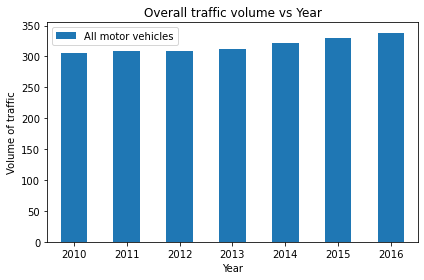

In [12]:
#plot traffic volumes vs year from 2010 to 2016
traffic_vol_df["All motor vehicles"] = traffic_vol_df["All motor vehicles"]
sorted_traffic_vol_df = traffic_vol_df.sort_values("Year", ascending=True)
sorted_traffic_vol_df.plot.bar(x="Year", y="All motor vehicles", linestyle="-")
plt.title('Overall traffic volume vs Year')
plt.xticks(rotation = 0,)

plt.xlabel("Year")
plt.ylabel("Volume of traffic")
plt.legend(loc="upper left")
plt.savefig("Images/Overall_traffic_volume.png", bbox_inches = "tight")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

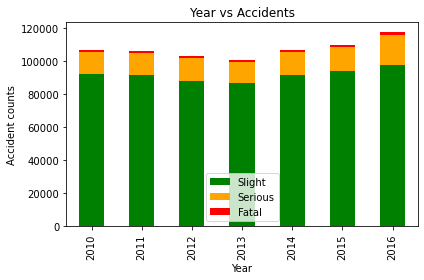

In [13]:
#plot accidents vs year from 2010 to 2016
accident_sev_yr = time_df.groupby(['Year','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_yr.sort_values(by=['Fatal','Serious','Slight'], ascending=False)
sorted_df=sorted_df.sort_values(by=['Year'], ascending=True)
sorted_df=sorted_df[["Slight","Serious","Fatal","Year"]]

plt.figure()
ax = sorted_df.plot.bar(x="Year", stacked=True, color={"Slight":"green","Serious":"orange","Fatal":"red"})

plt.title('Year vs Accidents')
plt.xlabel("Year")
plt.ylabel("Accident counts")
plt.legend(loc="best")
plt.savefig("Images/Year_vs_accidents.png", bbox_inches = "tight")
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

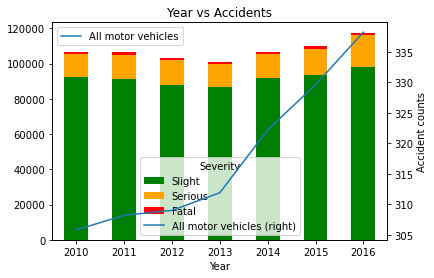

In [16]:
accident_sev_yr = time_df.groupby(['Year','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_yr.sort_values(by=['Fatal','Serious','Slight'], ascending=False)
sorted_df=sorted_df.sort_values(by=['Year'], ascending=True)
sorted_df=sorted_df[["Slight","Serious","Fatal","Year"]]

plt.figure()
ax = sorted_df.plot.bar(x="Year", stacked=True, color={"Slight":"green","Serious":"orange","Fatal":"red"})
ax2 = traffic_vol_df[["All motor vehicles"]].plot(kind="line", y="All motor vehicles", linestyle="-", secondary_y=True, ax=ax)


plt.title('Year vs Accidents')
plt.xlabel("Year")
plt.ylabel("Accident counts")
plt.legend(loc="best")

plt.show()

In [17]:
acc_tot = accident_sev_yr
acc_tot["Total"] = acc_tot["Fatal"]+acc_tot["Serious"]+acc_tot["Slight"]
acc_tot

Severity,Year,Fatal,Serious,Slight,Total
0,2010,1193,13195,92313,106701
1,2011,1250,13680,91390,106320
2,2012,1112,13727,88086,102925
3,2013,1132,13160,86421,100713
4,2014,1175,14096,91528,106799
5,2015,1220,14784,93669,109673
6,2016,1480,18177,97817,117474
